# **Business Understanding**



### **Context**

Industri ritel, khususnya sektor supermarket, mengalami pergeseran yang signifikan karena perubahan perilaku dan preferensi konsumen. Dengan meningkatnya e-commerce, supermarket menghadapi tantangan dalam mempertahankan dan menarik pelanggan. Memahami perilaku dan preferensi pelanggan sangat penting bagi supermarket untuk tetap kompetitif di pasar dan memastikan kepuasan pelanggan.

### **Problem Statement**

Supermarket ini menghadapi penurunan retensi pelanggan dan peningkatan tingkat pengabaian keranjang belanja. Hal ini menyebabkan penurunan penjualan dan kepuasan pelanggan secara keseluruhan. Memahami pendorong utama perilaku dan preferensi pelanggan sangat penting untuk meningkatkan retensi pelanggan, meningkatkan penjualan, dan meningkatkan pengalaman pelanggan secara keseluruhan. Supermarket ini berusaha menghadapi persaingan dengan menciptakan hybrid transactions dimana pelanggan dapat berbelanja dengan pergi ke toko maupun beli di web dapat dilakukan sekaligus.

### **Goals**

- Mengurangi tingkat pengabaian keranjang belanja sebesar 20% di kuartal berikutnya.
- Mengidentifikasi segmen pelanggan dengan potensi tertinggi untuk peluang upselling (Diskon) dan cross-selling (Gratis Barang).

### **Analytical Aproach**

- Segmentasi Pelanggan: <br>Memanfaatkan algoritme pengelompokan untuk mengelompokkan pelanggan berdasarkan perilaku pembelian, demografi, dan preferensi mereka. Hal ini akan memungkinkan identifikasi kelompok pelanggan yang berbeda dengan kebutuhan dan preferensi tertentu.
- Analisis Keranjang Pasar: <br>Menganalisis pola pembelian pelanggan untuk mengidentifikasi produk yang sering dibeli bersama. Hal ini akan membantu dalam menciptakan bundel produk dan promosi yang ditargetkan untuk mendorong penjualan silang dan meningkatkan nilai transaksi rata-rata.

### **Business Metrics**

- Tingkat Retensi Pelanggan: <br>Persentase pelanggan yang dipertahankan selama periode tertentu.
- Tingkat Pengabaian Keranjang Belanja: <br>Persentase keranjang belanja yang ditinggalkan dibandingkan dengan jumlah total transaksi yang dilakukan.
- Nilai Transaksi Rata-rata: <br>Jumlah rata-rata yang dibelanjakan oleh pelanggan per transaksi.
- Nilai Kepuasan Pelanggan (CSAT): <br>Pengukuran kepuasan pelanggan dengan pengalaman berbelanja secara keseluruhan.<br><br>
Dengan berfokus pada area dan metrik utama ini, supermarket dapat lebih memahami pelanggannya, meningkatkan retensi pelanggan, dan meningkatkan pengalaman berbelanja secara keseluruhan, yang mengarah pada peningkatan penjualan dan loyalitas pelanggan.

The dataset contains `2240 samples`. Contains `28 features` and `1 target boolean` variable `"Response"` :

**Accepted/Responses Campaign**

- `AcceptedCmp1` - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- `AcceptedCmp2` - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- `AcceptedCmp3` - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- `AcceptedCmp4` - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- `AcceptedCmp5` - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- `Response (target)` - 1 if customer accepted the offer in the last campaign, 0 otherwise
- `Complain` - 1 if customer complained in the previous 2 years

**Customer Information**

- `ID` - Customer's id
- `Year_Birth` - Customer's year of birth
- `Education` - customer’s level of education
- `Marital_Status` - customer’s marital status
- `Kidhome` - number of small children in customer’s household
- `Teenhome` - number of teenagers in customer’s household
- `Income` - customer’s yearly household income
- `Dt_Customer` - date of customer’s enrolment with the company
- `Recency` - number of days since the last purchase

**Sales Product Type**

- `MntFishProducts` - amount spent on fish products in the last 2 years
- `MntMeatProducts` - amount spent on meat products in the last 2 years
- `MntFruits` - amount spent on fruits products in the last 2 years
- `MntSweetProducts` - amount spent on sweet products in the last 2 years
- `MntWines` - amount spent on wine products in the last 2 years
- `MntGoldProds` - amount spent on gold products in the last 2 years

**Number of Purchases per Type**

- `NumDealsPurchases` - number of purchases made with discount
- `NumCatalogPurchases` - number of purchases made using catalogue
- `NumStorePurchases` - number of purchases made directly in stores
- `NumWebPurchases` - number of purchases made through company’s web site
- `NumWebVisitsMonth` - number of visits to company’s web site in the last month

**Cost and Revenue**

- `Z_CostContact = 3` (Cost to contact a customer)
- `Z_Revenue = 11` (Revenue after client accepting campaign)

# **Data Collection**

In [2]:
import seaborn as sns
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# set max_columns to None
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 90)

# Read in the data
df = pd.read_csv('../data/mid/Supermarket Customers.csv')
df.head(1)

,id,yearbirth,education,maritalstatus,income,kidhome,teenhome,dtcustomer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldproducts,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
0,12618,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,81,546,120,82,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1


# **Data Understanding**

In [3]:
df.describe()

,id,yearbirth,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldproducts,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
count,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.0,2058.0,2058.000000
mean,12710.888241,1968.893100,51920.429057,0.445578,0.509232,48.951895,302.174441,21.603984,150.390671,31.843537,22.003401,39.312439,2.227405,4.070457,2.620019,5.770651,5.300777,0.073372,0.076774,0.071914,0.065598,0.012634,0.009718,3.0,11.0,0.152089
std,964.818928,11.659871,20907.451977,0.537556,0.546489,28.999189,331.251530,27.184941,178.339415,40.167561,27.777459,39.760660,1.539557,2.649954,2.730377,3.239113,2.355067,0.260810,0.266297,0.258409,0.247638,0.111714,0.098124,0.0,0.0,0.359195
min,10001.000000,1940.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,12297.250000,1959.000000,35701.750000,0.000000,0.000000,24.000000,23.000000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,12868.500000,1970.000000,51371.000000,0.000000,0.000000,49.000000,174.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,13439.750000,1977.000000,68242.500000,1.000000,1.000000,74.000000,504.000000,33.000000,229.500000,50.000000,33.750000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,14000.000000,1996.000000,113734.000000,2.000000,2.000000,99.000000,1224.000000,81.000000,549.000000,120.000000,82.000000,126.000000,6.000000,11.000000,10.000000,13.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [4]:
df.columns

Index(['id', 'yearbirth', 'education', 'maritalstatus', 'income', 'kidhome',
       'teenhome', 'dtcustomer', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldproducts', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'complain', 'z_costcontact', 'z_revenue', 'response'],
      dtype='object')

In [5]:
# show data description
print(f"Jumlah Baris,Kolom : {df.shape}")
cols = ['id', 'yearbirth', 'education', 'maritalstatus', 'income', 'kidhome',
       'teenhome', 'dtcustomer', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldproducts', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'complain', 'z_costcontact', 'z_revenue', 'response']
pd.DataFrame({
    'data_type': df[cols].dtypes.values,
    'null_value': df[cols].isna().sum(),
    'Percentange': df[cols].isna().mean().values * 100,
    'n_unique': df[cols].nunique().values,
    'sample_unique': [df[col].unique() for col in cols]}
)

Jumlah Baris,Kolom : (2058, 29)


,data_type,null_value,Percentange,n_unique,sample_unique
id,int64,0,0.0,2058,"[12618, 13454, 12730, 12377, 12060, 13032, 12017, 13048, 13430, 13059, 12244, 12569, 1..."
yearbirth,int64,0,0.0,56,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1..."
education,object,0,0.0,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
maritalstatus,object,0,0.0,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
income,float64,0,0.0,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648..."
kidhome,int64,0,0.0,3,"[0, 1, 2]"
teenhome,int64,0,0.0,3,"[0, 1, 2]"
dtcustomer,object,0,0.0,663,"[2012-09-04, 2014-03-08, 2013-08-21, 2014-02-10, 2014-01-19, 2013-09-09, 2012-11-13, 2..."
recency,int64,0,0.0,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0..."
mntwines,int64,0,0.0,745,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86..."


In [6]:
df.dtypes

id                       int64
yearbirth                int64
education               object
maritalstatus           object
income                 float64
kidhome                  int64
teenhome                 int64
dtcustomer              object
recency                  int64
mntwines                 int64
mntfruits                int64
mntmeatproducts          int64
mntfishproducts          int64
mntsweetproducts         int64
mntgoldproducts          int64
numdealspurchases        int64
numwebpurchases          int64
numcatalogpurchases      int64
numstorepurchases        int64
numwebvisitsmonth        int64
acceptedcmp3             int64
acceptedcmp4             int64
acceptedcmp5             int64
acceptedcmp1             int64
acceptedcmp2             int64
complain                 int64
z_costcontact            int64
z_revenue                int64
response                 int64
dtype: object

# **Data Analysis**

## Objectives
Define Score RFM (Recency,Frequency,Monetary) Based On This Link [Here](https://www.omniconvert.com/blog/rfm-score/)<br>
Because My Data Is Below 20k then i will use scale 1 - 3 With Column:<br>
- Recency With Column "recency"
- Frequency With Column "totalpurchases" (Will be added later)
- Monetary With Column "mnttotal" (Will be added later)

## Fix Some Value In Some Column

In [7]:
# Change the value of some data based on education
df.value_counts('education')

education
Graduation    1030
PhD            450
Master         341
2n Cycle       188
Basic           49
Name: count, dtype: int64

Based on this link [here](https://www.ehea.info/page-three-cycle-system) the 2n Cycle is Master Degree so i will change the value of 2n Cycle to Master

In [8]:
# Change the value of 2nd Cycle to Master
df.loc[df['education'] == '2n Cycle', 'education'] = 'Master'
df.value_counts('education')

education
Graduation    1030
Master         529
PhD            450
Basic           49
Name: count, dtype: int64

In [9]:
# Change the value of Graduation to Bachelor
df.loc[df['education'] == 'Graduation', 'education'] = 'Bachelor'
df.value_counts('education')

education
Bachelor    1030
Master       529
PhD          450
Basic         49
Name: count, dtype: int64

In [10]:
# Change the value of some data based on maritalstatus
df.value_counts('maritalstatus')

maritalstatus
Married     795
Together    521
Single      448
Divorced    216
Widow        71
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [11]:
df.maritalstatus = df.maritalstatus.replace({'Together': 'Partner',
                                            'Married': 'Partner',
                                            'Divorced': 'Single',
                                            'Widow': 'Single', 
                                            'Alone': 'Single',
                                            'Absurd': 'Single',
                                            'YOLO': 'Single'})
df.value_counts('maritalstatus')

maritalstatus
Partner    1316
Single      742
Name: count, dtype: int64

Clean the data in column **education** and **marital status** (Only Duplicate Value) <br>
Because i see 3 duplicate data after i do this step

In [12]:
# drop duplicate data
df = df.drop_duplicates(subset=df.columns.difference(['id']), keep='first')
len(df)

2055

## Add Column For Data Analysis

In [13]:
# add age column based on yearbirth column and its position next to yearbirth column
df.insert(2, 'age', 2015-df['yearbirth'])
df.head(1)

,id,yearbirth,age,education,maritalstatus,income,kidhome,teenhome,dtcustomer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldproducts,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
0,12618,1957,58,Bachelor,Single,58138.0,0,0,2012-09-04,58,635,81,546,120,82,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1


In [14]:
# add new column mnttotal which is the sum of mntwines, mntfruits, mntmeatproducts, mntfishproducts, mntsweetproducts, mntgoldproducts
df.insert(16, 'mnttotal', df['mntwines'] + df['mntfruits'] + df['mntmeatproducts'] + df['mntfishproducts'] + df['mntsweetproducts'] + df['mntgoldproducts'])
df.head(1)

,id,yearbirth,age,education,maritalstatus,income,kidhome,teenhome,dtcustomer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldproducts,mnttotal,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
0,12618,1957,58,Bachelor,Single,58138.0,0,0,2012-09-04,58,635,81,546,120,82,88,1552,3,8,10,4,7,0,0,0,0,0,0,3,11,1


In [15]:
# add new column totalpurchases which is the sum of numdealspurchases, numwebpurchases, numcatalogpurchases, numstorepurchases
df.insert(22, 'totalpurchases', df['numdealspurchases'] + df['numwebpurchases'] + df['numcatalogpurchases'] + df['numstorepurchases'])
df.head(1)

,id,yearbirth,age,education,maritalstatus,income,kidhome,teenhome,dtcustomer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldproducts,mnttotal,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,totalpurchases,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
0,12618,1957,58,Bachelor,Single,58138.0,0,0,2012-09-04,58,635,81,546,120,82,88,1552,3,8,10,4,7,25,0,0,0,0,0,0,3,11,1


In [16]:
# add new column categorical_age which is the age group of each customer
df.insert(3, 'categorical_age', pd.cut(df['age'], bins=[-np.inf, 35, 55, 90], labels=['0-35', '36-55', '56-90']))
print(df.value_counts('categorical_age').sort_index())
df.head(1)

categorical_age
0-35      388
36-55    1143
56-90     524
Name: count, dtype: int64


,id,yearbirth,age,categorical_age,education,maritalstatus,income,kidhome,teenhome,dtcustomer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldproducts,mnttotal,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,totalpurchases,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
0,12618,1957,58,56-90,Bachelor,Single,58138.0,0,0,2012-09-04,58,635,81,546,120,82,88,1552,3,8,10,4,7,25,0,0,0,0,0,0,3,11,1


In [17]:
# add new column categorical_income which is the income group of each customer
df.insert(7, 'categorical_income', pd.cut(df['income'], bins=[-np.inf, 20000, 50000, 120000], labels=['0-20k', '20k-50k', '50k-120k']))
print(df.value_counts('categorical_income').sort_index())
df.head(1)

categorical_income
0-20k        117
20k-50k      860
50k-120k    1078
Name: count, dtype: int64


,id,yearbirth,age,categorical_age,education,maritalstatus,income,categorical_income,kidhome,teenhome,dtcustomer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldproducts,mnttotal,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,totalpurchases,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
0,12618,1957,58,56-90,Bachelor,Single,58138.0,50k-120k,0,0,2012-09-04,58,635,81,546,120,82,88,1552,3,8,10,4,7,25,0,0,0,0,0,0,3,11,1


In [18]:
# add new column totalchild which is the sum of kidhome and teenhome
df.insert(10, 'totalchild', df['kidhome'] + df['teenhome'])
df.head(1)

,id,yearbirth,age,categorical_age,education,maritalstatus,income,categorical_income,kidhome,teenhome,totalchild,dtcustomer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldproducts,mnttotal,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,totalpurchases,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
0,12618,1957,58,56-90,Bachelor,Single,58138.0,50k-120k,0,0,0,2012-09-04,58,635,81,546,120,82,88,1552,3,8,10,4,7,25,0,0,0,0,0,0,3,11,1


In [19]:
# add new column day_dtcustomer which is the day of dcustomer column
# convert dtcustomer column to datetime where format is '%d-%m-%Y'
df['dtcustomer'] = pd.to_datetime(df['dtcustomer'], format='%Y-%m-%d')

# define min and max value of day_dtcustomer column
min_value = df['dtcustomer'].min()
max_value = df['dtcustomer'].max()

# each value for day_dtcustomer column is the difference day between date in dtcustomer column and min_value
df.insert(12, 'day_dtcustomer', ((df['dtcustomer'] - min_value).dt.days)+1)
df.head(1)

,id,yearbirth,age,categorical_age,education,maritalstatus,income,categorical_income,kidhome,teenhome,totalchild,dtcustomer,day_dtcustomer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldproducts,mnttotal,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,totalpurchases,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
0,12618,1957,58,56-90,Bachelor,Single,58138.0,50k-120k,0,0,0,2012-09-04,37,58,635,81,546,120,82,88,1552,3,8,10,4,7,25,0,0,0,0,0,0,3,11,1


In [20]:
# show data where day_dtcustomer is the max value
df[df['day_dtcustomer'] == df['day_dtcustomer'].min()]

,id,yearbirth,age,categorical_age,education,maritalstatus,income,categorical_income,kidhome,teenhome,totalchild,dtcustomer,day_dtcustomer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldproducts,mnttotal,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,totalpurchases,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
1202,12900,1970,45,36-55,PhD,Partner,55158.0,50k-120k,1,1,2,2012-07-30,1,72,293,0,87,4,11,23,418,4,7,2,5,7,18,0,0,0,0,0,0,3,11,1


In [21]:
# add new column dtcustomer_category which is the category of each customer based on day_dtcustomer column
df.insert(13, 'dtcustomer_category', pd.cut(df['day_dtcustomer'], bins=[0, 100, 200, 300, 400, 500, 600, 700], labels=['0-100', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700']))
print(df.value_counts('dtcustomer_category').sort_index())
df.head(1)

dtcustomer_category
0-100      304
100-200    294
200-300    293
300-400    289
400-500    306
500-600    281
600-700    288
Name: count, dtype: int64


,id,yearbirth,age,categorical_age,education,maritalstatus,income,categorical_income,kidhome,teenhome,totalchild,dtcustomer,day_dtcustomer,dtcustomer_category,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldproducts,mnttotal,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,totalpurchases,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
0,12618,1957,58,56-90,Bachelor,Single,58138.0,50k-120k,0,0,0,2012-09-04,37,0-100,58,635,81,546,120,82,88,1552,3,8,10,4,7,25,0,0,0,0,0,0,3,11,1


In [22]:
# add new column totalacceptedcmp which is sum of acceptedcmp1, acceptedcmp2, acceptedcmp3, acceptedcmp4, acceptedcmp5, and response
df.insert(37, 'totalacceptedcmp', df['acceptedcmp1'] + df['acceptedcmp2'] + df['acceptedcmp3'] + df['acceptedcmp4'] + df['acceptedcmp5'] + df['response'])
print(df.value_counts('totalacceptedcmp').sort_index())
df.head(1)

totalacceptedcmp
0    1488
1     346
2     132
3      47
4      33
5       9
Name: count, dtype: int64


,id,yearbirth,age,categorical_age,education,maritalstatus,income,categorical_income,kidhome,teenhome,totalchild,dtcustomer,day_dtcustomer,dtcustomer_category,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldproducts,mnttotal,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,totalpurchases,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response,totalacceptedcmp
0,12618,1957,58,56-90,Bachelor,Single,58138.0,50k-120k,0,0,0,2012-09-04,37,0-100,58,635,81,546,120,82,88,1552,3,8,10,4,7,25,0,0,0,0,0,0,3,11,1,1


In [23]:
print("MntWines             : ", df['mntwines'].max())

# add new column mntwines_category based on mntwines
df.insert(16, 'mntwines_category', pd.cut(df['mntwines'], bins=[-np.inf, 150, 500, 1250], labels=['0-150', '151-500', '501-1250']))
print(df.value_counts('mntwines_category').sort_index())
df.head(1)

MntWines             :  1224
mntwines_category
0-150       954
151-500     582
501-1250    519
Name: count, dtype: int64


,id,yearbirth,age,categorical_age,education,maritalstatus,income,categorical_income,kidhome,teenhome,totalchild,dtcustomer,day_dtcustomer,dtcustomer_category,recency,mntwines,mntwines_category,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldproducts,mnttotal,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,totalpurchases,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response,totalacceptedcmp
0,12618,1957,58,56-90,Bachelor,Single,58138.0,50k-120k,0,0,0,2012-09-04,37,0-100,58,635,501-1250,81,546,120,82,88,1552,3,8,10,4,7,25,0,0,0,0,0,0,3,11,1,1


In [24]:
print("Mntfruits            : ", df['mntfruits'].max())

# add new column mntfruits_category based on mntwines
df.insert(18, 'mntfruits_category', pd.cut(df['mntfruits'], bins=[-np.inf, 15, 50, 100], labels=['0-15', '16-50', '51-100']))
print(df.value_counts('mntfruits_category').sort_index())
df.head(1)

Mntfruits            :  81
mntfruits_category
0-15      1256
16-50      438
51-100     361
Name: count, dtype: int64


,id,yearbirth,age,categorical_age,education,maritalstatus,income,categorical_income,kidhome,teenhome,totalchild,dtcustomer,day_dtcustomer,dtcustomer_category,recency,mntwines,mntwines_category,mntfruits,mntfruits_category,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldproducts,mnttotal,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,totalpurchases,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response,totalacceptedcmp
0,12618,1957,58,56-90,Bachelor,Single,58138.0,50k-120k,0,0,0,2012-09-04,37,0-100,58,635,501-1250,81,51-100,546,120,82,88,1552,3,8,10,4,7,25,0,0,0,0,0,0,3,11,1,1


In [25]:
print("Mntmeatproducts      : ", df['mntmeatproducts'].max())

# add new column mntmeatproducts_category based on mntmeatproducts where max value = 1725
df.insert(20, 'mntmeatproducts_category', pd.cut(df['mntmeatproducts'], bins=[-np.inf, 50, 250, 600], labels=['0-50', '51-250', '251-600']))
print(df.value_counts('mntmeatproducts_category').sort_index())
df.head(1)

Mntmeatproducts      :  549
mntmeatproducts_category
0-50       925
51-250     657
251-600    473
Name: count, dtype: int64


,id,yearbirth,age,categorical_age,education,maritalstatus,income,categorical_income,kidhome,teenhome,totalchild,dtcustomer,day_dtcustomer,dtcustomer_category,recency,mntwines,mntwines_category,mntfruits,mntfruits_category,mntmeatproducts,mntmeatproducts_category,mntfishproducts,mntsweetproducts,mntgoldproducts,mnttotal,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,totalpurchases,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response,totalacceptedcmp
0,12618,1957,58,56-90,Bachelor,Single,58138.0,50k-120k,0,0,0,2012-09-04,37,0-100,58,635,501-1250,81,51-100,546,251-600,120,82,88,1552,3,8,10,4,7,25,0,0,0,0,0,0,3,11,1,1


In [26]:
print("Mntfishproducts      : ", df['mntfishproducts'].max())

# add new column mntfishproducts_category based on mntfishproducts where max value = 259
df.insert(22, 'mntfishproducts_category', pd.cut(df['mntfishproducts'], bins=[-np.inf, 30, 80, 150], labels=['0-30', '31-80', '81-150']))
print(df.value_counts('mntfishproducts_category').sort_index())
df.head(1)

Mntfishproducts      :  120
mntfishproducts_category
0-30      1383
31-80      338
81-150     334
Name: count, dtype: int64


,id,yearbirth,age,categorical_age,education,maritalstatus,income,categorical_income,kidhome,teenhome,totalchild,dtcustomer,day_dtcustomer,dtcustomer_category,recency,mntwines,mntwines_category,mntfruits,mntfruits_category,mntmeatproducts,mntmeatproducts_category,mntfishproducts,mntfishproducts_category,mntsweetproducts,mntgoldproducts,mnttotal,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,totalpurchases,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response,totalacceptedcmp
0,12618,1957,58,56-90,Bachelor,Single,58138.0,50k-120k,0,0,0,2012-09-04,37,0-100,58,635,501-1250,81,51-100,546,251-600,120,81-150,82,88,1552,3,8,10,4,7,25,0,0,0,0,0,0,3,11,1,1


In [27]:
print("Mntsweetproducts     : ", df['mntsweetproducts'].max())

# add new column mntsweetproducts_category based on mntsweetproducts where max value = 263
df.insert(24, 'mntsweetproducts_category', pd.cut(df['mntsweetproducts'], bins=[-np.inf, 30, 60, 100], labels=['0-30', '31-60', '61-100']))
print(df.value_counts('mntsweetproducts_category').sort_index())
df.head(1)

Mntsweetproducts     :  82
mntsweetproducts_category
0-30      1513
31-60      230
61-100     312
Name: count, dtype: int64


,id,yearbirth,age,categorical_age,education,maritalstatus,income,categorical_income,kidhome,teenhome,totalchild,dtcustomer,day_dtcustomer,dtcustomer_category,recency,mntwines,mntwines_category,mntfruits,mntfruits_category,mntmeatproducts,mntmeatproducts_category,mntfishproducts,mntfishproducts_category,mntsweetproducts,mntsweetproducts_category,mntgoldproducts,mnttotal,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,totalpurchases,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response,totalacceptedcmp
0,12618,1957,58,56-90,Bachelor,Single,58138.0,50k-120k,0,0,0,2012-09-04,37,0-100,58,635,501-1250,81,51-100,546,251-600,120,81-150,82,61-100,88,1552,3,8,10,4,7,25,0,0,0,0,0,0,3,11,1,1


In [28]:
print("Mntgoldproducts      : ", df['mntgoldproducts'].max())

# add new column mntgoldproducts_category based on mntgoldproducts where max value = 362
df.insert(26, 'mntgoldproducts_category', pd.cut(df['mntgoldproducts'], bins=[-np.inf, 30, 80, 150], labels=['0-30', '31-80', '81-150']))
print(df.value_counts('mntgoldproducts_category').sort_index())
df.head(1)

Mntgoldproducts      :  126
mntgoldproducts_category
0-30      1178
31-80      513
81-150     364
Name: count, dtype: int64


,id,yearbirth,age,categorical_age,education,maritalstatus,income,categorical_income,kidhome,teenhome,totalchild,dtcustomer,day_dtcustomer,dtcustomer_category,recency,mntwines,mntwines_category,mntfruits,mntfruits_category,mntmeatproducts,mntmeatproducts_category,mntfishproducts,mntfishproducts_category,mntsweetproducts,mntsweetproducts_category,mntgoldproducts,mntgoldproducts_category,mnttotal,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,totalpurchases,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response,totalacceptedcmp
0,12618,1957,58,56-90,Bachelor,Single,58138.0,50k-120k,0,0,0,2012-09-04,37,0-100,58,635,501-1250,81,51-100,546,251-600,120,81-150,82,61-100,88,81-150,1552,3,8,10,4,7,25,0,0,0,0,0,0,3,11,1,1


In [29]:
print("Mnttotal             : ", df['mnttotal'].max())

# add new column mnttotal_category based on mnttotal where max value = 2525
df.insert(28, 'mnttotal_category', pd.cut(df['mnttotal'], bins=[-np.inf, 300, 1000, 2200], labels=[1, 2, 3]))
print(df.value_counts('mnttotal_category').sort_index())
df.head(1)

# convert mnttotal_category column to int
df['mnttotal_category'] = df['mnttotal_category'].astype(int)

Mnttotal             :  2092
mnttotal_category
1    944
2    605
3    506
Name: count, dtype: int64


In [30]:
print("numdealspurchases    : ", df['numdealspurchases'].max())

# add new column numdealspurchases_category based on numdealspurchases where max value = 15
df.insert(30, 'numdealspurchases_category', pd.cut(df['numdealspurchases'], bins=[-np.inf, 1, 4, 10], labels=['0-1', '2-4', '5-10']))
print(df.value_counts('numdealspurchases_category').sort_index())
df.head(1)

numdealspurchases    :  6
numdealspurchases_category
0-1     923
2-4     912
5-10    220
Name: count, dtype: int64


,id,yearbirth,age,categorical_age,education,maritalstatus,income,categorical_income,kidhome,teenhome,totalchild,dtcustomer,day_dtcustomer,dtcustomer_category,recency,mntwines,mntwines_category,mntfruits,mntfruits_category,mntmeatproducts,mntmeatproducts_category,mntfishproducts,mntfishproducts_category,mntsweetproducts,mntsweetproducts_category,mntgoldproducts,mntgoldproducts_category,mnttotal,mnttotal_category,numdealspurchases,numdealspurchases_category,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,totalpurchases,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response,totalacceptedcmp
0,12618,1957,58,56-90,Bachelor,Single,58138.0,50k-120k,0,0,0,2012-09-04,37,0-100,58,635,501-1250,81,51-100,546,251-600,120,81-150,82,61-100,88,81-150,1552,3,3,2-4,8,10,4,7,25,0,0,0,0,0,0,3,11,1,1


In [31]:
print("numwebpurchases      : ", df['numwebpurchases'].max())


# add new column numwebpurchases_category based on numwebpurchases where max value = 27
df.insert(32, 'numwebpurchases_category', pd.cut(df['numwebpurchases'], bins=[-np.inf, 2, 6, 15], labels=['0-2', '3-6', '7-15']))
print(df.value_counts('numwebpurchases_category').sort_index())
df.head(1)

numwebpurchases      :  11
numwebpurchases_category
0-2     710
3-6     955
7-15    390
Name: count, dtype: int64


,id,yearbirth,age,categorical_age,education,maritalstatus,income,categorical_income,kidhome,teenhome,totalchild,dtcustomer,day_dtcustomer,dtcustomer_category,recency,mntwines,mntwines_category,mntfruits,mntfruits_category,mntmeatproducts,mntmeatproducts_category,mntfishproducts,mntfishproducts_category,mntsweetproducts,mntsweetproducts_category,mntgoldproducts,mntgoldproducts_category,mnttotal,mnttotal_category,numdealspurchases,numdealspurchases_category,numwebpurchases,numwebpurchases_category,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,totalpurchases,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response,totalacceptedcmp
0,12618,1957,58,56-90,Bachelor,Single,58138.0,50k-120k,0,0,0,2012-09-04,37,0-100,58,635,501-1250,81,51-100,546,251-600,120,81-150,82,61-100,88,81-150,1552,3,3,2-4,8,7-15,10,4,7,25,0,0,0,0,0,0,3,11,1,1


In [32]:
print("numcatalogpurchases  : ", df['numcatalogpurchases'].max())

# add new column numcatalogpurchases_category based on numcatalogpurchases where max value = 28
df.insert(34, 'numcatalogpurchases_category', pd.cut(df['numcatalogpurchases'], bins=[-np.inf, 2, 6, 12], labels=['0-2', '3-6', '7-12']))
print(df.value_counts('numcatalogpurchases_category').sort_index())
df.head(1)

numcatalogpurchases  :  10
numcatalogpurchases_category
0-2     1246
3-6      581
7-12     228
Name: count, dtype: int64


,id,yearbirth,age,categorical_age,education,maritalstatus,income,categorical_income,kidhome,teenhome,totalchild,dtcustomer,day_dtcustomer,dtcustomer_category,recency,mntwines,mntwines_category,mntfruits,mntfruits_category,mntmeatproducts,mntmeatproducts_category,mntfishproducts,mntfishproducts_category,mntsweetproducts,mntsweetproducts_category,mntgoldproducts,mntgoldproducts_category,mnttotal,mnttotal_category,numdealspurchases,numdealspurchases_category,numwebpurchases,numwebpurchases_category,numcatalogpurchases,numcatalogpurchases_category,numstorepurchases,numwebvisitsmonth,totalpurchases,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response,totalacceptedcmp
0,12618,1957,58,56-90,Bachelor,Single,58138.0,50k-120k,0,0,0,2012-09-04,37,0-100,58,635,501-1250,81,51-100,546,251-600,120,81-150,82,61-100,88,81-150,1552,3,3,2-4,8,7-15,10,7-12,4,7,25,0,0,0,0,0,0,3,11,1,1


In [33]:
print("numstorepurchases    : ", df['numstorepurchases'].max())

# add new column numstorepurchases_category based on numstorepurchases where max value = 13
df.insert(36, 'numstorepurchases_category', pd.cut(df['numstorepurchases'], bins=[-np.inf, 3, 8, 15], labels=['0-3', '4-8', '9-15']))
print(df.value_counts('numstorepurchases_category').sort_index())
df.head(1)

numstorepurchases    :  13
numstorepurchases_category
0-3     676
4-8     923
9-15    456
Name: count, dtype: int64


,id,yearbirth,age,categorical_age,education,maritalstatus,income,categorical_income,kidhome,teenhome,totalchild,dtcustomer,day_dtcustomer,dtcustomer_category,recency,mntwines,mntwines_category,mntfruits,mntfruits_category,mntmeatproducts,mntmeatproducts_category,mntfishproducts,mntfishproducts_category,mntsweetproducts,mntsweetproducts_category,mntgoldproducts,mntgoldproducts_category,mnttotal,mnttotal_category,numdealspurchases,numdealspurchases_category,numwebpurchases,numwebpurchases_category,numcatalogpurchases,numcatalogpurchases_category,numstorepurchases,numstorepurchases_category,numwebvisitsmonth,totalpurchases,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response,totalacceptedcmp
0,12618,1957,58,56-90,Bachelor,Single,58138.0,50k-120k,0,0,0,2012-09-04,37,0-100,58,635,501-1250,81,51-100,546,251-600,120,81-150,82,61-100,88,81-150,1552,3,3,2-4,8,7-15,10,7-12,4,4-8,7,25,0,0,0,0,0,0,3,11,1,1


In [34]:
print("numwebvisitsmonth    : ", df['numwebvisitsmonth'].max())

# add new column numwebvisitsmonth_category based on numwebvisitsmonth where max value = 20
df.insert(38, 'numwebvisitsmonth_category', pd.cut(df['numwebvisitsmonth'], bins=[-np.inf, 3, 8, 15], labels=['0-3', '4-8', '9-15']))
print(df.value_counts('numwebvisitsmonth_category').sort_index())
df.head(1)

numwebvisitsmonth    :  13
numwebvisitsmonth_category
0-3      525
4-8     1438
9-15      92
Name: count, dtype: int64


,id,yearbirth,age,categorical_age,education,maritalstatus,income,categorical_income,kidhome,teenhome,totalchild,dtcustomer,day_dtcustomer,dtcustomer_category,recency,mntwines,mntwines_category,mntfruits,mntfruits_category,mntmeatproducts,mntmeatproducts_category,mntfishproducts,mntfishproducts_category,mntsweetproducts,mntsweetproducts_category,mntgoldproducts,mntgoldproducts_category,mnttotal,mnttotal_category,numdealspurchases,numdealspurchases_category,numwebpurchases,numwebpurchases_category,numcatalogpurchases,numcatalogpurchases_category,numstorepurchases,numstorepurchases_category,numwebvisitsmonth,numwebvisitsmonth_category,totalpurchases,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response,totalacceptedcmp
0,12618,1957,58,56-90,Bachelor,Single,58138.0,50k-120k,0,0,0,2012-09-04,37,0-100,58,635,501-1250,81,51-100,546,251-600,120,81-150,82,61-100,88,81-150,1552,3,3,2-4,8,7-15,10,7-12,4,4-8,7,4-8,25,0,0,0,0,0,0,3,11,1,1


In [35]:
print("totalpurchases       : ", df['totalpurchases'].max())

# add new column totalpurchases_category based on totalpurchases where max value = 32
df.insert(40, 'totalpurchases_category', pd.cut(df['totalpurchases'], bins=[-np.inf, 10, 20, 40], labels=[1, 2, 3]))
print(df.value_counts('totalpurchases_category').sort_index())
df.head(1)

# convert totalpurchases_category column to int
df['totalpurchases_category'] = df['totalpurchases_category'].astype(int)

totalpurchases       :  35
totalpurchases_category
1    761
2    755
3    539
Name: count, dtype: int64


In [36]:
# add new column recency_category based on recency where max value = 99
df.insert(15, 'recency_category', pd.cut(df['recency'], bins=[-np.inf, 30, 60, 120], labels=[3, 2, 1]))
print(df.value_counts('recency_category').sort_index(ascending=False))
df.head(1)

# convert recency_category column to int
df['recency_category'] = df['recency_category'].astype(int)

recency_category
1    789
2    601
3    665
Name: count, dtype: int64


In [37]:
# add new column behaviour_score based on sum of recency_category, totalpurchases_category, mnttotal_category
df.insert(52, 'behaviour_score', df['recency_category'] + df['totalpurchases_category'] + df['mnttotal_category'])
print(df.value_counts('behaviour_score').sort_index(ascending=False))
df.head(1)

behaviour_score
9     85
8    255
7    356
6    328
5    441
4    306
3    284
Name: count, dtype: int64


,id,yearbirth,age,categorical_age,education,maritalstatus,income,categorical_income,kidhome,teenhome,totalchild,dtcustomer,day_dtcustomer,dtcustomer_category,recency,recency_category,mntwines,mntwines_category,mntfruits,mntfruits_category,mntmeatproducts,mntmeatproducts_category,mntfishproducts,mntfishproducts_category,mntsweetproducts,mntsweetproducts_category,mntgoldproducts,mntgoldproducts_category,mnttotal,mnttotal_category,numdealspurchases,numdealspurchases_category,numwebpurchases,numwebpurchases_category,numcatalogpurchases,numcatalogpurchases_category,numstorepurchases,numstorepurchases_category,numwebvisitsmonth,numwebvisitsmonth_category,totalpurchases,totalpurchases_category,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response,totalacceptedcmp,behaviour_score
0,12618,1957,58,56-90,Bachelor,Single,58138.0,50k-120k,0,0,0,2012-09-04,37,0-100,58,2,635,501-1250,81,51-100,546,251-600,120,81-150,82,61-100,88,81-150,1552,3,3,2-4,8,7-15,10,7-12,4,4-8,7,4-8,25,3,0,0,0,0,0,0,3,11,1,1,8


In [38]:
# add new column behaviour_score_category based on recency where max value = 99
df.insert(53, 'behaviour_score_category', pd.cut(df['behaviour_score'], bins=[-np.inf, 4, 6, 9], labels=["Excellent", "Great", "Okay"]))
print(df.value_counts('behaviour_score_category').sort_index(ascending=False))
df.head(1)

behaviour_score_category
Okay         696
Great        769
Excellent    590
Name: count, dtype: int64


,id,yearbirth,age,categorical_age,education,maritalstatus,income,categorical_income,kidhome,teenhome,totalchild,dtcustomer,day_dtcustomer,dtcustomer_category,recency,recency_category,mntwines,mntwines_category,mntfruits,mntfruits_category,mntmeatproducts,mntmeatproducts_category,mntfishproducts,mntfishproducts_category,mntsweetproducts,mntsweetproducts_category,mntgoldproducts,mntgoldproducts_category,mnttotal,mnttotal_category,numdealspurchases,numdealspurchases_category,numwebpurchases,numwebpurchases_category,numcatalogpurchases,numcatalogpurchases_category,numstorepurchases,numstorepurchases_category,numwebvisitsmonth,numwebvisitsmonth_category,totalpurchases,totalpurchases_category,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response,totalacceptedcmp,behaviour_score,behaviour_score_category
0,12618,1957,58,56-90,Bachelor,Single,58138.0,50k-120k,0,0,0,2012-09-04,37,0-100,58,2,635,501-1250,81,51-100,546,251-600,120,81-150,82,61-100,88,81-150,1552,3,3,2-4,8,7-15,10,7-12,4,4-8,7,4-8,25,3,0,0,0,0,0,0,3,11,1,1,8,Okay


<Axes: >

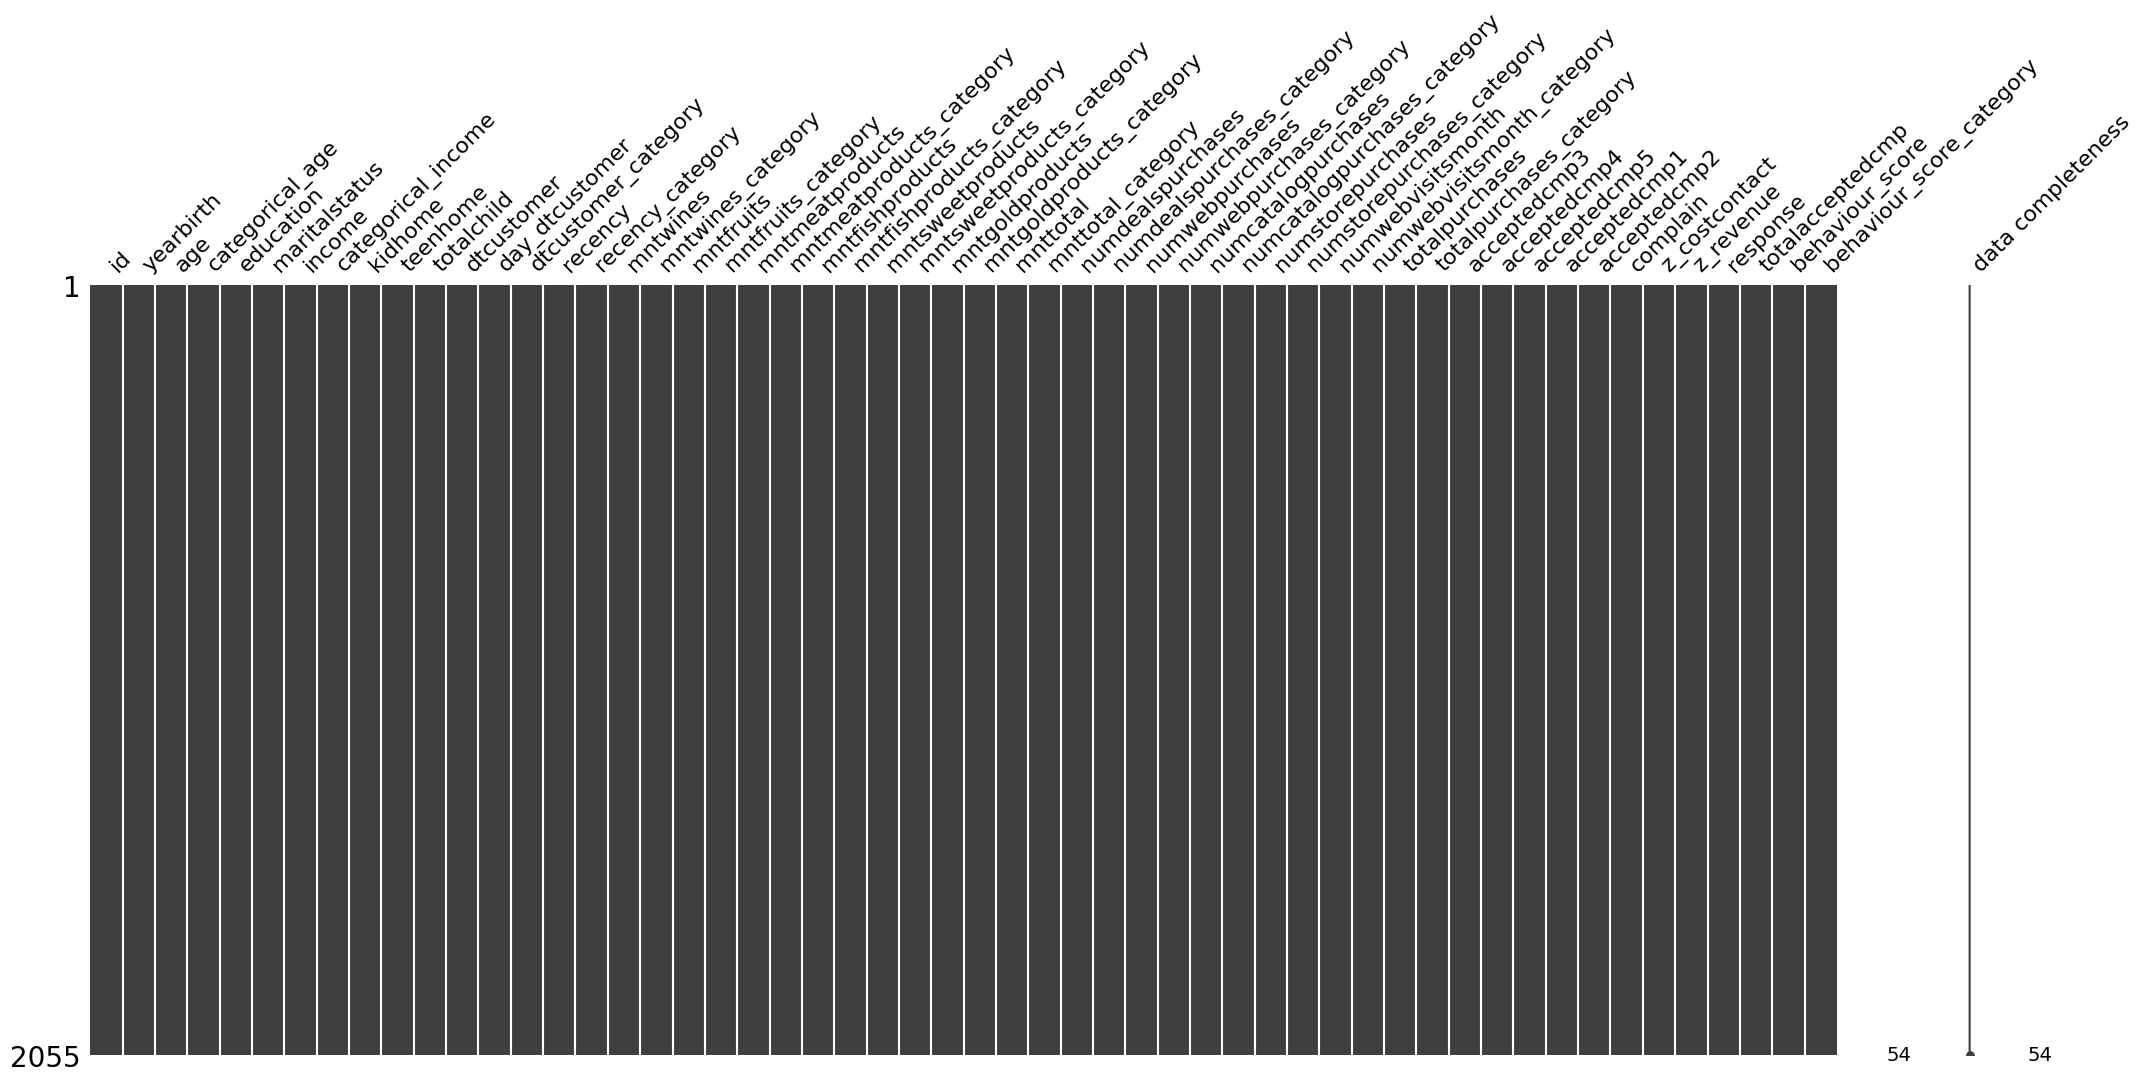

In [39]:
# show msno matrix with its index
msno.matrix(df, labels=True)

In [40]:
df.head(1)

,id,yearbirth,age,categorical_age,education,maritalstatus,income,categorical_income,kidhome,teenhome,totalchild,dtcustomer,day_dtcustomer,dtcustomer_category,recency,recency_category,mntwines,mntwines_category,mntfruits,mntfruits_category,mntmeatproducts,mntmeatproducts_category,mntfishproducts,mntfishproducts_category,mntsweetproducts,mntsweetproducts_category,mntgoldproducts,mntgoldproducts_category,mnttotal,mnttotal_category,numdealspurchases,numdealspurchases_category,numwebpurchases,numwebpurchases_category,numcatalogpurchases,numcatalogpurchases_category,numstorepurchases,numstorepurchases_category,numwebvisitsmonth,numwebvisitsmonth_category,totalpurchases,totalpurchases_category,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response,totalacceptedcmp,behaviour_score,behaviour_score_category
0,12618,1957,58,56-90,Bachelor,Single,58138.0,50k-120k,0,0,0,2012-09-04,37,0-100,58,2,635,501-1250,81,51-100,546,251-600,120,81-150,82,61-100,88,81-150,1552,3,3,2-4,8,7-15,10,7-12,4,4-8,7,4-8,25,3,0,0,0,0,0,0,3,11,1,1,8,Okay


In [41]:
# Drop Column that not needed
df = df.drop(['z_costcontact','z_revenue'], axis=1)
df.head(1)

,id,yearbirth,age,categorical_age,education,maritalstatus,income,categorical_income,kidhome,teenhome,totalchild,dtcustomer,day_dtcustomer,dtcustomer_category,recency,recency_category,mntwines,mntwines_category,mntfruits,mntfruits_category,mntmeatproducts,mntmeatproducts_category,mntfishproducts,mntfishproducts_category,mntsweetproducts,mntsweetproducts_category,mntgoldproducts,mntgoldproducts_category,mnttotal,mnttotal_category,numdealspurchases,numdealspurchases_category,numwebpurchases,numwebpurchases_category,numcatalogpurchases,numcatalogpurchases_category,numstorepurchases,numstorepurchases_category,numwebvisitsmonth,numwebvisitsmonth_category,totalpurchases,totalpurchases_category,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,totalacceptedcmp,behaviour_score,behaviour_score_category
0,12618,1957,58,56-90,Bachelor,Single,58138.0,50k-120k,0,0,0,2012-09-04,37,0-100,58,2,635,501-1250,81,51-100,546,251-600,120,81-150,82,61-100,88,81-150,1552,3,3,2-4,8,7-15,10,7-12,4,4-8,7,4-8,25,3,0,0,0,0,0,0,1,1,8,Okay


In [42]:
# Save to csv
df.to_csv('../data/clean/Supermarket Customers.csv', index=False)

# **Insight**

## Campaign

In [50]:
# Show Percentage of Data Where All Columns of the totalacceptedcmp is 0
result = len(df[df['totalacceptedcmp'] == 0]) / len(df) * 100
print(f"Percentage of Data Where They Are Not Respond To The Campaign : {result:.2f}%")

Percentage of Data Where They Are Not Respond To The Campaign : 72.41%


As You Can More Than 50% of the data is not respond to the campaign, so we need to make a strategy to make the customer respond to the campaign

In [51]:
# Show Perfomance of each column acceptedcmp1, acceptedcmp2, acceptedcmp3, acceptedcmp4, acceptedcmp5, response with sum value
# Creating a subsection of the dataframe to analyze the marketing campaigns.
campaigns = df.iloc[:, 42:49]

campaigns = campaigns.sum().to_frame()
campaigns.columns = ['Frequency']

campaigns['Percentage'] = campaigns['Frequency']/len(df)*100
campaigns['Percentage'] = campaigns['Percentage'].round(2)

print(f"Customer That Received Campaign : {len(df[df['totalacceptedcmp'] != 0])}")
campaigns

Customer That Received Campaign : 567


,Frequency,Percentage
acceptedcmp3,150,7.30
acceptedcmp4,158,7.69
acceptedcmp5,148,7.20
acceptedcmp1,135,6.57
acceptedcmp2,26,1.27
complain,20,0.97
response,311,15.13


## RFM (Recency, Frequency, Monetary)

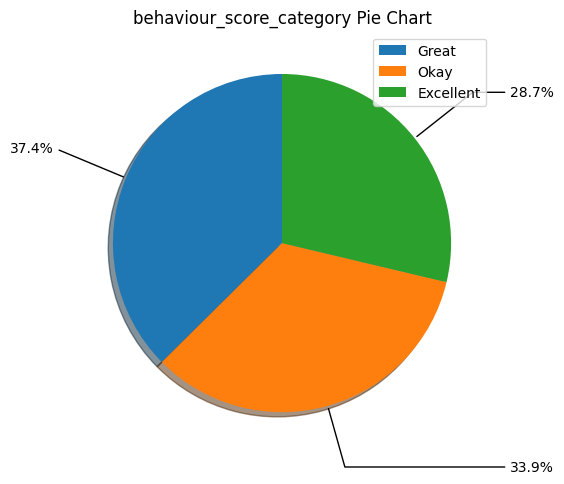

In [48]:
def show_pie_chart(df, col):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    value_counts = df[col].value_counts()
    patches, texts = plt.pie(value_counts, shadow=True, startangle=90)
    
    # Calculate percentages
    percentages = 100.*value_counts/value_counts.sum()

    # Only draw annotations when the percentage is large enough
    for i, (p, pc) in enumerate(zip(patches, percentages)):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        config = {"horizontalalignment": horizontalalignment, "arrowprops": {"arrowstyle": "-", "connectionstyle": connectionstyle}}
        plt.annotate(f'{pc:.1f}%', xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y), **config)
    
    plt.legend(patches, value_counts.index, loc="best")
    plt.title(f"{col} Pie Chart")
    plt.show()

# categorical_age
# categorical_income
# dtcustomer_category
# mntwines_category
# mntfruits_category
# mntmeatproducts_category
# mntfishproducts_category
# mntsweetproducts_category
# mntgoldproducts_category
# mnttotal_category
# numdealspurchases_category
# numwebpurchases_category
# numcatalogpurchases_category
# numstorepurchases_category
# numwebvisitsmonth_category
# totalpurchases_category
# recency_category
# behaviour_score_category

show_pie_chart(df, 'behaviour_score_category')

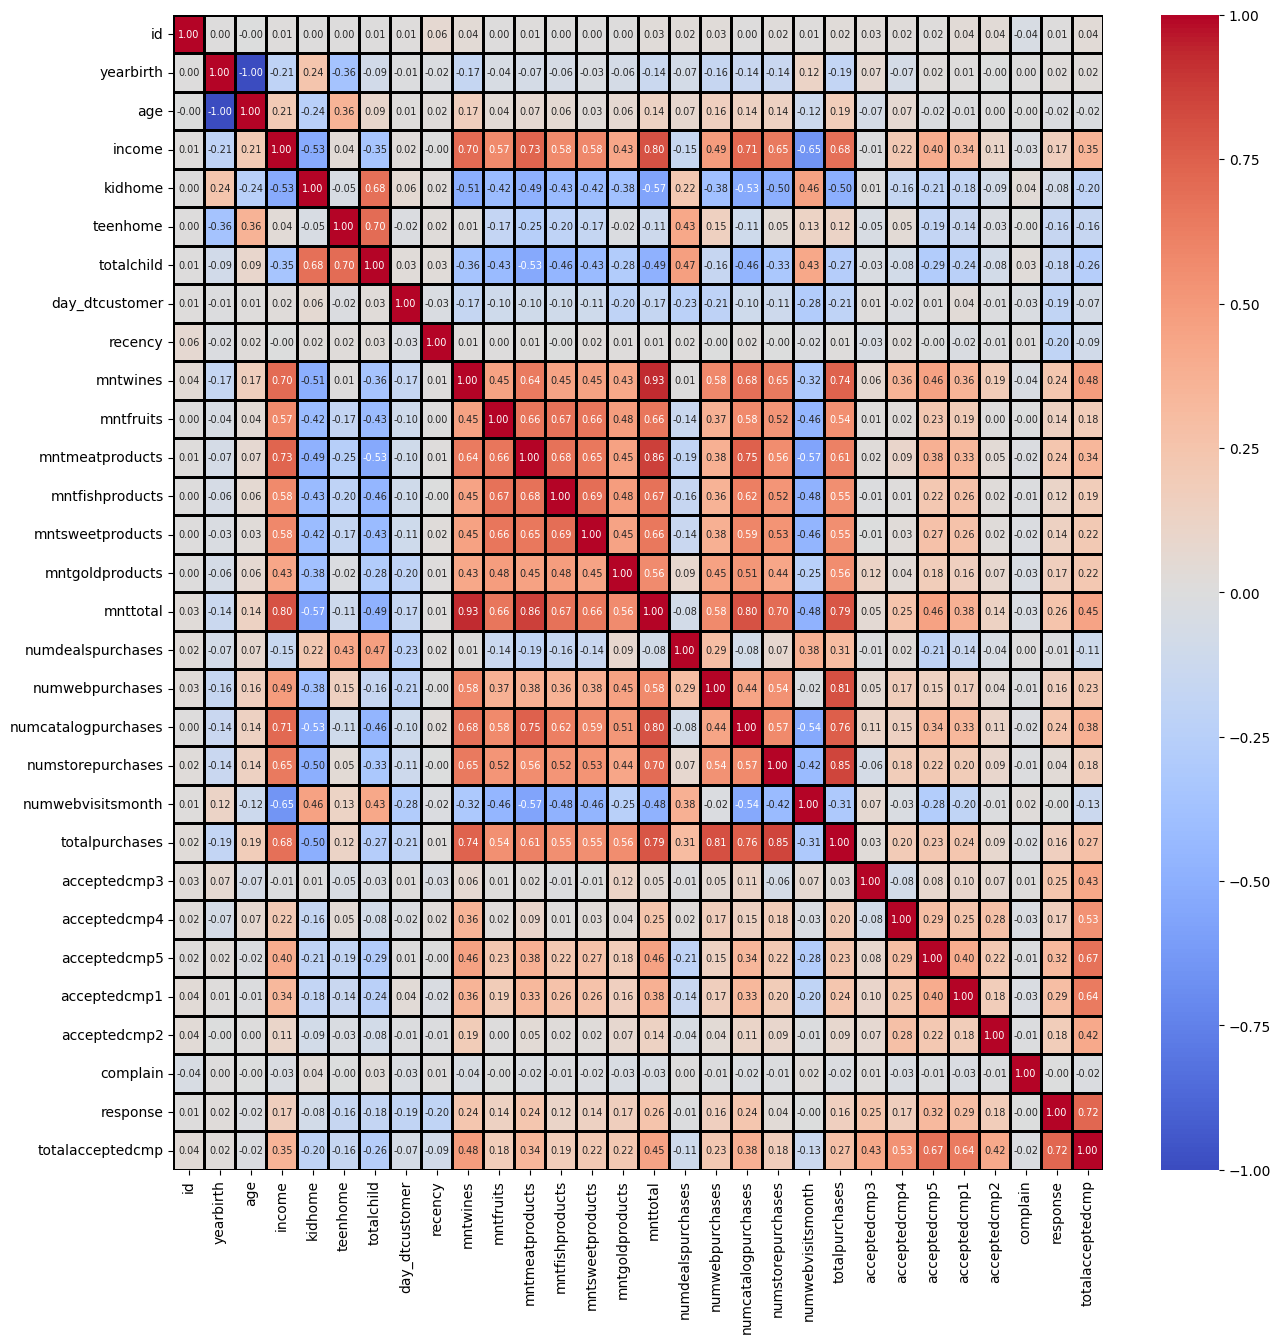

In [46]:
# Get Data With Numeric Type
df_num = df.select_dtypes(include=['int64', 'float64'])

# Print Correlation Matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, linecolor='black', annot_kws={"size":7} )
plt.show()

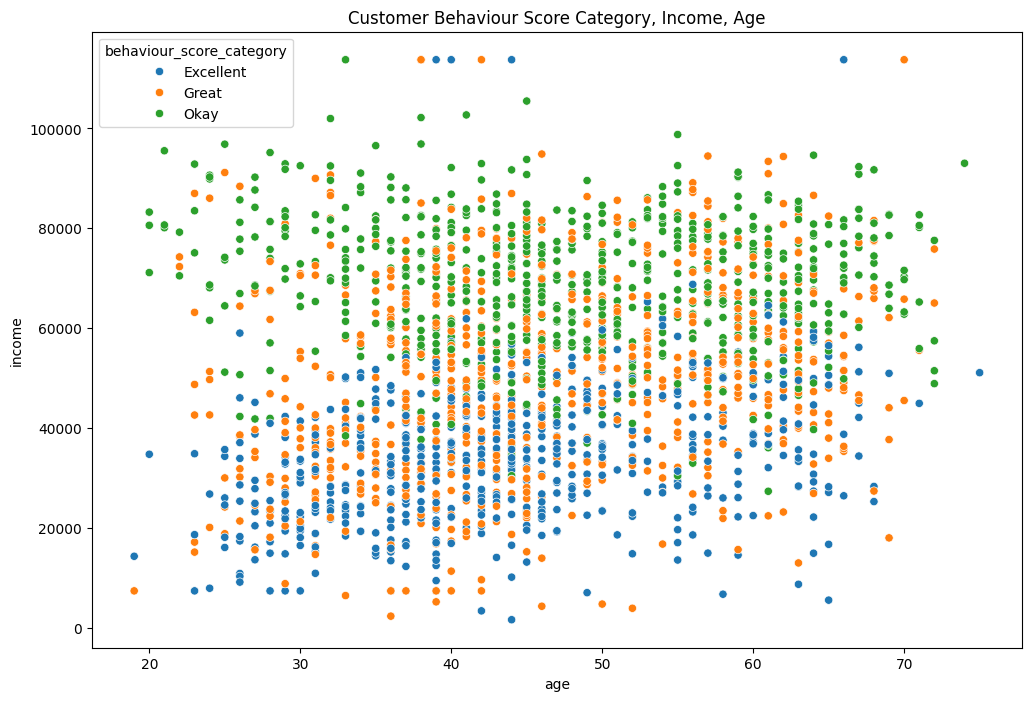

In [47]:
# Show Scatter Plot To Show Customer Behaviour_Score_Category , Income_Category, TotalPurchases_Category, MntTotal_Category
plt.figure(figsize=(12,8))
sns.scatterplot(x='age', y='income', hue='behaviour_score_category', data=df)
plt.title('Customer Behaviour Score Category, Income, Age')
plt.show()

# **Recommendation**

sdasdasdadasd